In [1]:
#Load the data and check if there is any abonormality in the data (in my case there was extra columns with NaN values
# then i checked and found there was numeric heading instead of column name so then skipped that and concatenated using glob)

import pandas as pd
import glob

def load_csv(filename):
    with open(filename, 'r') as file:
        first_line = file.readline()
        if first_line.replace(',', '').strip().isdigit():  # Check if the first line is numeric
            df = pd.read_csv(filename, skiprows=1)  # Skip the first row
        else:
            df = pd.read_csv(filename)
    return df

df = pd.concat(
    [
        load_csv(filename) 
        for filename in glob.glob('*.csv')
    ], 
    ignore_index=True
)
df

# https://towardsdatascience.com/load-multiple-csv-pandas-9c0c88c5adff

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2013-09-22T00:00:00,16.6,16.2,97.99,0.000,0.0,NaN,0.0,0.0,7.6,258.0,1026.9,93.3,0.0,0.0,0.0
1,2013-09-22T01:00:00,16.6,16.3,97.95,0.018,100.0,rain,0.0,0.0,9.7,265.0,1026.9,96.6,0.0,0.0,0.0
2,2013-09-22T02:00:00,16.6,16.2,98.00,0.000,0.0,NaN,0.0,0.0,4.0,304.0,1027.1,96.4,0.0,0.0,0.0
3,2013-09-22T03:00:00,16.5,16.1,97.53,0.000,0.0,NaN,0.0,0.0,3.8,267.0,1027.2,100.0,0.0,0.0,0.0
4,2013-09-22T04:00:00,16.5,16.1,97.53,NaN,0.0,NaN,0.0,0.0,5.2,266.0,1027.2,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122839,2014-02-28T19:00:00,4.8,3.2,89.80,0.000,0.0,NaN,NaN,NaN,21.6,346.0,1001.5,90.8,0.0,0.0,0.0
122840,2014-02-28T20:00:00,4.4,3.1,91.76,0.000,0.0,NaN,NaN,NaN,21.0,349.0,1001.7,92.3,0.0,0.0,0.0
122841,2014-02-28T21:00:00,4.4,3.2,92.34,0.000,0.0,NaN,NaN,NaN,18.3,344.0,1002.2,81.4,0.0,0.0,0.0
122842,2014-02-28T22:00:00,4.3,3.1,91.76,0.000,0.0,NaN,NaN,NaN,16.7,344.0,1002.7,78.5,0.0,0.0,0.0


In [2]:
# change date column to datentime so that panda can recognises 
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.info()
df.isnull().sum() # Checking the null values in the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          122844 non-null  datetime64[ns]
 1   temp              122590 non-null  float64       
 2   dew               122568 non-null  float64       
 3   humidity          122575 non-null  float64       
 4   precip            122565 non-null  float64       
 5   precipprob        122558 non-null  float64       
 6   preciptype        11277 non-null   object        
 7   snow              89810 non-null   float64       
 8   snowdepth         89279 non-null   float64       
 9   windspeed         122583 non-null  float64       
 10  winddir           122567 non-null  float64       
 11  sealevelpressure  122319 non-null  float64       
 12  cloudcover        122556 non-null  float64       
 13  solarradiation    122514 non-null  float64       
 14  sola

datetime                 0
temp                   254
dew                    276
humidity               269
precip                 279
precipprob             286
preciptype          111567
snow                 33034
snowdepth            33565
windspeed              261
winddir                277
sealevelpressure       525
cloudcover             288
solarradiation         330
solarenergy            364
uvindex                358
dtype: int64

In [3]:
# Decided to drop the preciptype because 90% null values 
df = df.drop(['preciptype'], axis=1) 
df


,datetime,temp,dew,humidity,precip,precipprob,snow,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2013-09-22 00:00:00,16.6,16.2,97.99,0.000,0.0,0.0,7.6,258.0,1026.9,93.3,0.0,0.0,0.0
1,2013-09-22 01:00:00,16.6,16.3,97.95,0.018,100.0,0.0,9.7,265.0,1026.9,96.6,0.0,0.0,0.0
2,2013-09-22 02:00:00,16.6,16.2,98.00,0.000,0.0,0.0,4.0,304.0,1027.1,96.4,0.0,0.0,0.0
3,2013-09-22 03:00:00,16.5,16.1,97.53,0.000,0.0,0.0,3.8,267.0,1027.2,100.0,0.0,0.0,0.0
4,2013-09-22 04:00:00,16.5,16.1,97.53,NaN,0.0,0.0,5.2,266.0,1027.2,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122839,2014-02-28 19:00:00,4.8,3.2,89.80,0.000,0.0,NaN,21.6,346.0,1001.5,90.8,0.0,0.0,0.0
122840,2014-02-28 20:00:00,4.4,3.1,91.76,0.000,0.0,NaN,21.0,349.0,1001.7,92.3,0.0,0.0,0.0
122841,2014-02-28 21:00:00,4.4,3.2,92.34,0.000,0.0,NaN,18.3,344.0,1002.2,81.4,0.0,0.0,0.0
122842,2014-02-28 22:00:00,4.3,3.1,91.76,0.000,0.0,NaN,16.7,344.0,1002.7,78.5,0.0,0.0,0.0


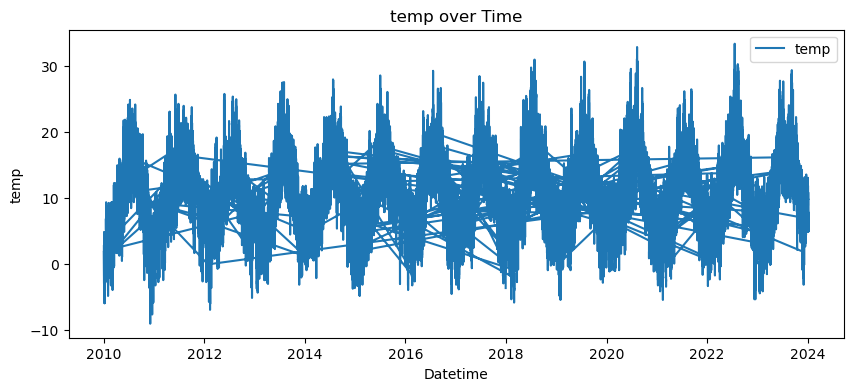

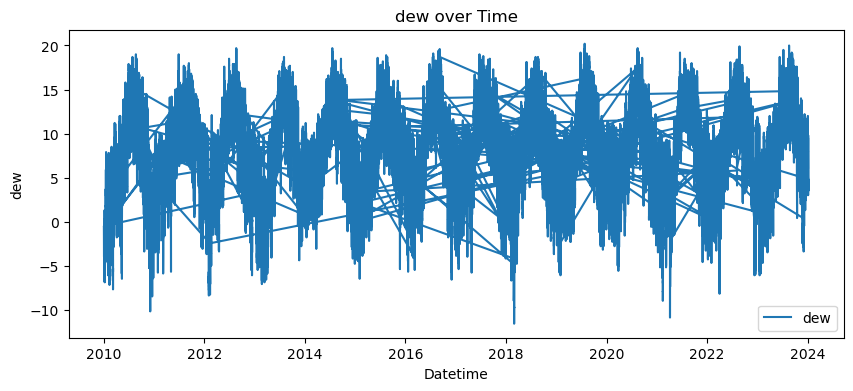

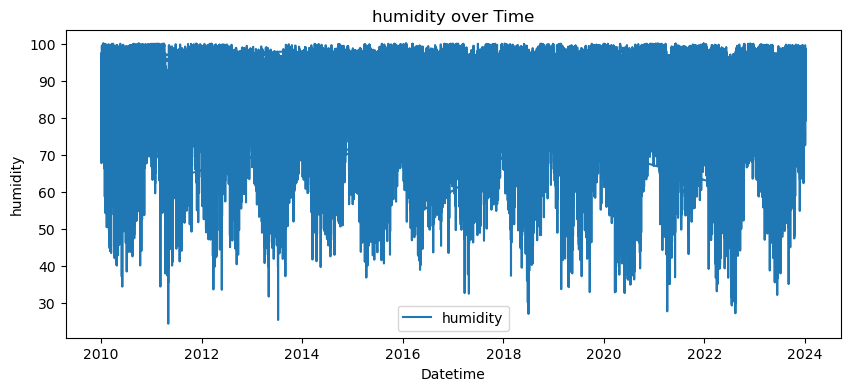

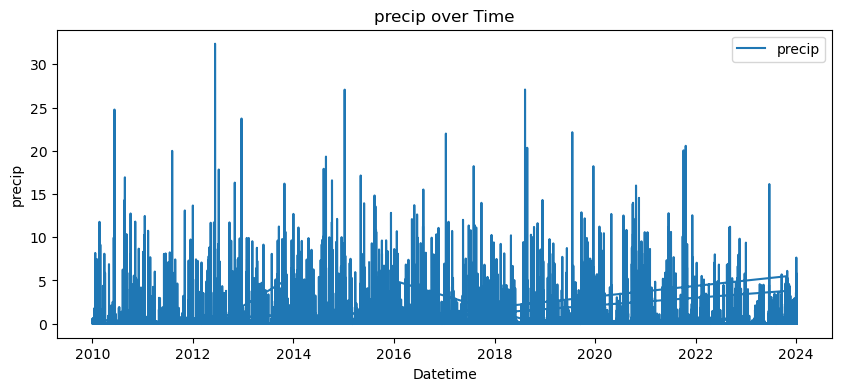

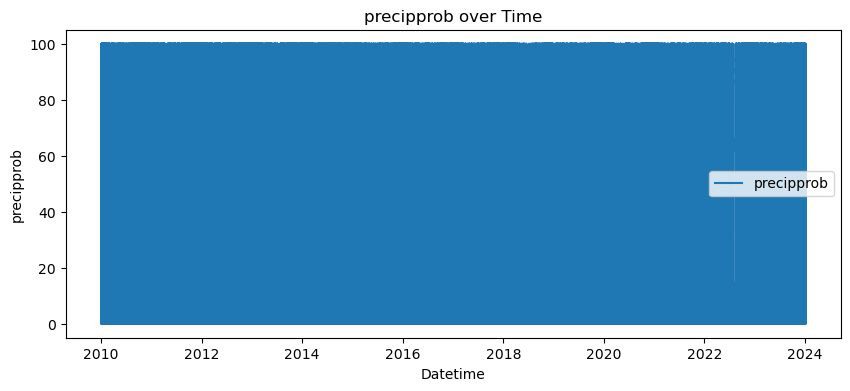

TypeError: 'value' must be an instance of str or bytes, not a float

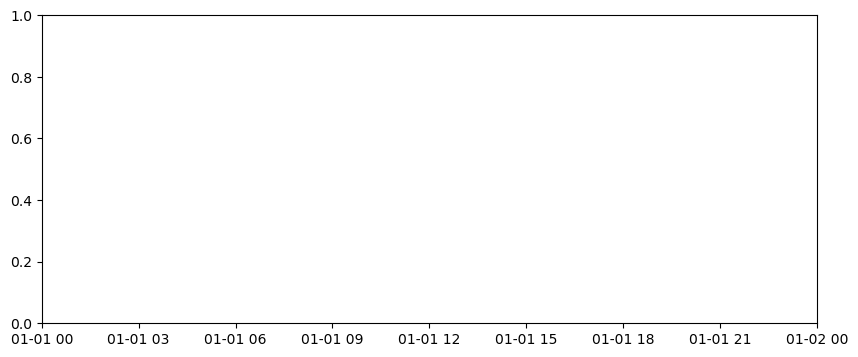

In [3]:
import matplotlib.pyplot as plt

for column in df:
    if column != 'datetime':  # excluding the datetime column.
        plt.figure(figsize=(10, 4))  # Setting the figure size for each individual plot.
        plt.plot(df['datetime'], df[column], label=column)
        plt.title(f'{column} over Time')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.legend()
        #plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap.
        plt.show()


In [ ]:
import seaborn as sns
# Group by year
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
#create a boxplot for each year
for column in df:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=df, x='year', y=column)
    plt.title(f'Yearly Boxplot of {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.tight_layout()  
    plt.show()


In [ ]:
import numpy as np
# Plotting a seasonal plot for each numeric column
for column in df:
    if column != 'month':
        # Pivot the data for the seasonal plot
        pivot_table = df.pivot_table(values=column, index='month', columns='year', aggfunc='mean')

        # Now we plot the seasonal plot for the current column
        plt.figure(figsize=(15, 8))
        sns.lineplot(data=pivot_table, dashes=False)
        plt.title(f'Seasonal Plot of {column}')
        plt.xlabel('Month')
        plt.ylabel(column)
        plt.xticks(rotation=45)  # Rotate x labels for better readability
        plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
        plt.show()
